<a href="https://colab.research.google.com/github/AshwinPrksh00/Historical-Hourly-Weather-Data/blob/main/Full_EDA_Tel_Aviv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis on Tel-Aviv

In [1]:
#Importing all preprocessing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Import the dataset
df = pd.read_csv('tel_aviv_orig.csv')
df['datetime'] = pd.DatetimeIndex(df.datetime)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


### Dealing with Missing Data

In [3]:
#Checking out total null values
df.isnull().sum()

datetime                  0
humidity               1113
pressure                930
temperature             793
weather_description     793
wind_direction          793
wind_speed              794
dtype: int64

In [4]:
df[df['temperature'].isna()]

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44461,2017-10-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44462,2017-10-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44463,2017-10-28 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44464,2017-10-28 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Since we have 793 values of fully empty rows and it is less than 5% of original data, we will remove them from dataset
df.drop(df[df['temperature'].isna()].index, inplace=True)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [6]:
df.isnull().sum()

datetime                 0
humidity               320
pressure               137
temperature              0
weather_description      0
wind_direction           0
wind_speed               1
dtype: int64

In [7]:
#Checking for outliers
px.box(df.pressure)

In [8]:
#Removing extreme outliers in pressure
df.drop(df[df.pressure<980].index, inplace=True)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [9]:
#Removing extreme outliers in wind speed
df.drop(df[df.wind_speed>25].index, inplace=True)
df

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [10]:
#Filling in missing values by median
cols = ['humidity',	'pressure', 'wind_speed']
df[cols] = df[cols].fillna(df.median().iloc[0])
# df.fillna(method='ffill', inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,63.0,1012.0,305.470000,sky is clear,101.0,0.0
2,2012-10-01 14:00:00,62.0,1012.0,304.310000,sky is clear,315.0,0.0
3,2012-10-01 15:00:00,62.0,1012.0,304.281841,sky is clear,307.0,0.0
4,2012-10-01 16:00:00,62.0,1012.0,304.238015,sky is clear,294.0,0.0
5,2012-10-01 17:00:00,62.0,1012.0,304.194188,sky is clear,282.0,0.0
...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,68.0,1011.0,295.710000,sky is clear,0.0,1.0
44457,2017-10-27 21:00:00,72.0,1011.0,293.150000,sky is clear,0.0,1.0
44458,2017-10-27 22:00:00,60.0,1011.0,294.150000,sky is clear,0.0,1.0
44459,2017-10-27 23:00:00,56.0,1011.0,294.150000,sky is clear,150.0,3.0


In [11]:
df.isnull().sum()

datetime               0
humidity               0
pressure               0
temperature            0
weather_description    0
wind_direction         0
wind_speed             0
dtype: int64

In [123]:
df.weather_description.value_counts()

sky is clear                    21737
few clouds                       8238
scattered clouds                 7823
broken clouds                    2919
light rain                       1578
overcast clouds                   819
moderate rain                     541
dust                              163
heavy intensity rain              137
haze                              134
mist                              123
shower rain                        45
fog                                45
thunderstorm                       40
proximity thunderstorm             28
thunderstorm with rain             26
thunderstorm with light rain       14
drizzle                            10
thunderstorm with heavy rain        6
ragged shower rain                  4
snow                                4
smoke                               4
heavy intensity shower rain         3
very heavy rain                     2
light intensity drizzle             1
light intensity shower rain         1
Name: weathe

In [12]:
#Now datetime wont have any value for modelling
df1 = df.drop('datetime', axis=1).reset_index().drop('index', axis=1)
df1.head()

,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
0,63.0,1012.0,305.470000,sky is clear,101.0,0.0
1,62.0,1012.0,304.310000,sky is clear,315.0,0.0
2,62.0,1012.0,304.281841,sky is clear,307.0,0.0
3,62.0,1012.0,304.238015,sky is clear,294.0,0.0
4,62.0,1012.0,304.194188,sky is clear,282.0,0.0


In [13]:
df1.describe()

,humidity,pressure,temperature,wind_direction,wind_speed
count,44445.000000,44445.000000,44445.000000,44445.000000,44445.000000
mean,66.876522,1010.924356,294.514868,171.472202,2.721026
std,16.406612,52.758726,6.675242,121.853160,1.924317
min,5.000000,69.000000,271.049000,0.000000,0.000000
25%,58.000000,1009.000000,289.450473,40.000000,1.000000
50%,69.000000,1013.000000,294.900000,184.000000,2.000000
75%,78.000000,1018.000000,299.810000,280.000000,4.000000
max,100.000000,1039.000000,320.930000,360.000000,69.000000


In [14]:
#Code for making the target variable into just 2 categories
df1['weather_description'] = ['sky is clear' if i == 'sky is clear' else 'sky is not clear' for i in df1['weather_description']]
df1.tail(20)

,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
44425,52.0,1013.0,291.71,sky is clear,120.0,2.0
44426,48.0,1013.0,292.71,sky is clear,0.0,0.0
44427,43.0,1013.0,295.59,sky is clear,0.0,0.0
44428,47.0,1013.0,297.59,sky is clear,270.0,3.0
44429,47.0,1013.0,299.04,sky is clear,230.0,2.0
44430,39.0,1012.0,299.48,sky is clear,240.0,3.0
44431,30.0,1011.0,301.48,sky is clear,240.0,3.0
44432,37.0,1011.0,301.59,sky is clear,250.0,4.0
44433,39.0,1011.0,300.59,sky is clear,270.0,5.0
44434,51.0,1011.0,300.15,sky is clear,280.0,4.0


In [15]:
df1.weather_description.value_counts()

sky is not clear    22708
sky is clear        21737
Name: weather_description, dtype: int64

In [16]:
#Splitting into train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = df1.drop('weather_description', axis=1)
target = df1['weather_description']


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)

#Standardising the values 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

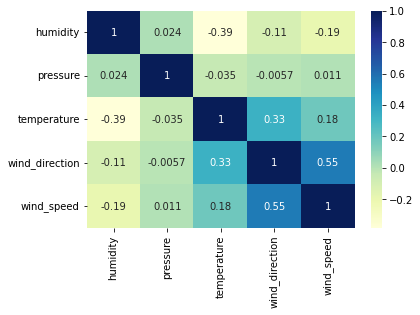

In [17]:
sns.heatmap(features.corr(), annot=True, cmap='YlGnBu')

### Ensemble Methods


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

metrics_dict = dict()
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'Histogram Based GBM', 'XGBoost', 'LightGBM', 'CatBoost', 'ANN', 'SVM']

def cross_val_report(model, X,Y, report=True):
  
  '''A Small function to do cross validation as well as printing Classification report
      Arguments():

      model : 
        The Classifier Model that was created with different ML Algorithms
      X : list/tuple 
        Contains both x_train and x_test values
      Y : list/tuple
        Contains both y_train and y_test values
      report: boolean, default=True
        To fit the model as well as print a classification report on testing
        
      return: list
        A list containing various scores which is to be used for further analysis'''
        
  x_train, x_test = X[0], X[1]
  y_train, y_test = Y[0], Y[1]
  CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
  n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV, n_jobs=-1, error_score='raise')
  print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
  y_pred = model.fit(x_train, y_train).predict(x_test)
  # print(np.mean(f1_score(y_test, y_pred, average=None)))
  clf_metrics = [accuracy_score(y_test, y_pred), np.mean(precision_score(y_test, y_pred, average=None)), np.mean(recall_score(y_test, y_pred, average=None)), np.mean(f1_score(y_test, y_pred, average=None))]

  if report:
    print(classification_report(y_test, y_pred, zero_division=0))
  return clf_metrics

In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dclf  = DecisionTreeClassifier(criterion='gini')
metrics_dict[model_names[0]] = cross_val_report(dclf, [x_train, x_test], [y_train, y_test])

Accuracy: 0.698 (0.009)
                  precision    recall  f1-score   support

    sky is clear       0.70      0.71      0.70      6535
sky is not clear       0.71      0.70      0.71      6799

        accuracy                           0.70     13334
       macro avg       0.70      0.70      0.70     13334
    weighted avg       0.70      0.70      0.70     13334



In [20]:
metrics_dict

{'Decision Tree': [0.704064796760162,
  0.7040196178284279,
  0.7040943169440845,
  0.7040189235407948]}

In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=150, criterion='entropy')
metrics_dict[model_names[1]] = cross_val_report(rfclf, [x_train, x_test], [y_train, y_test])

Accuracy: 0.759 (0.007)
                  precision    recall  f1-score   support

    sky is clear       0.76      0.75      0.76      6535
sky is not clear       0.76      0.77      0.77      6799

        accuracy                           0.76     13334
       macro avg       0.76      0.76      0.76     13334
    weighted avg       0.76      0.76      0.76     13334



In [22]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbclf = GradientBoostingClassifier(loss='exponential', n_estimators=200, learning_rate=0.1)
metrics_dict[model_names[2]] = cross_val_report(gbclf, [x_train, x_test], [y_train, y_test])

Accuracy: 0.728 (0.008)
                  precision    recall  f1-score   support

    sky is clear       0.73      0.71      0.72      6535
sky is not clear       0.73      0.74      0.74      6799

        accuracy                           0.73     13334
       macro avg       0.73      0.73      0.73     13334
    weighted avg       0.73      0.73      0.73     13334



In [23]:
#Histogram Based Gradient Boosting Machine
#Cannot use HistGradientBooster as minimum number of observation for each class must be 2
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hbclf = HistGradientBoostingClassifier()
metrics_dict[model_names[3]] = cross_val_report(hbclf, [x_train, x_test], [y_train, y_test])

# CV_hb = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
# hb_n_scores = cross_val_score(hbclf, x_train, y_train, scoring='accuracy', cv=CV_hb, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(hb_n_scores), np.std(hb_n_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Accuracy: 0.741 (0.007)
                  precision    recall  f1-score   support

    sky is clear       0.74      0.73      0.74      6535
sky is not clear       0.75      0.75      0.75      6799

        accuracy                           0.74     13334
       macro avg       0.74      0.74      0.74     13334
    weighted avg       0.74      0.74      0.74     13334



In [24]:
#XGBoost
from xgboost import XGBClassifier

xgbclf = XGBClassifier()
metrics_dict[model_names[4]] = cross_val_report(xgbclf, [x_train, x_test], [y_train, y_test])
# cv_xg = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
# xg_n_scores = cross_val_score(xgbclf, x_train, y_train, scoring='accuracy', cv=cv_xg, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(xg_n_scores), np.std(xg_n_scores)))

Accuracy: 0.718 (0.008)
                  precision    recall  f1-score   support

    sky is clear       0.71      0.69      0.70      6535
sky is not clear       0.71      0.73      0.72      6799

        accuracy                           0.71     13334
       macro avg       0.71      0.71      0.71     13334
    weighted avg       0.71      0.71      0.71     13334



In [25]:
#LightGBM
from lightgbm import LGBMClassifier

lgbclf = LGBMClassifier()
metrics_dict[model_names[5]] = cross_val_report(lgbclf, [x_train, x_test], [y_train, y_test])
# cv_lgb = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
# lgb_n_scores = cross_val_score(lgbclf, x_train, y_train, scoring='accuracy', cv=cv_lgb, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(lgb_n_scores), np.std(lgb_n_scores)))
# y_pred_lgb = lgbclf.fit(x_train, y_train).predict(x_test)
# print(classification_report(y_test, y_pred_lgb))

Accuracy: 0.743 (0.007)
                  precision    recall  f1-score   support

    sky is clear       0.74      0.73      0.74      6535
sky is not clear       0.75      0.76      0.75      6799

        accuracy                           0.74     13334
       macro avg       0.74      0.74      0.74     13334
    weighted avg       0.74      0.74      0.74     13334



In [26]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [27]:
#CatBoost
from catboost import CatBoostClassifier

catclf = CatBoostClassifier()
metrics_dict[model_names[6]] = cross_val_report(catclf, [x_train, x_test], [y_train, y_test])

# cv_cat = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
# cat_n_scores = cross_val_score(catclf, x_train, y_train, scoring='accuracy', cv=cv_lgb, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(cat_n_scores), np.std(cat_n_scores)))
# y_pred_cat = catclf.fit(x_train, y_train).predict(x_test)
# print(classification_report(y_test, y_pred_cat))

Accuracy: 0.749 (0.007)
Learning rate set to 0.04471
0:	learn: 0.6845825	total: 56.4ms	remaining: 56.4s
1:	learn: 0.6764174	total: 64.4ms	remaining: 32.2s
2:	learn: 0.6689544	total: 72.5ms	remaining: 24.1s
3:	learn: 0.6621126	total: 82ms	remaining: 20.4s
4:	learn: 0.6558357	total: 91.2ms	remaining: 18.2s
5:	learn: 0.6496198	total: 99.8ms	remaining: 16.5s
6:	learn: 0.6438906	total: 108ms	remaining: 15.3s
7:	learn: 0.6389596	total: 115ms	remaining: 14.3s
8:	learn: 0.6344707	total: 124ms	remaining: 13.6s
9:	learn: 0.6304492	total: 132ms	remaining: 13.1s
10:	learn: 0.6267534	total: 140ms	remaining: 12.6s
11:	learn: 0.6232617	total: 151ms	remaining: 12.5s
12:	learn: 0.6197297	total: 163ms	remaining: 12.4s
13:	learn: 0.6167966	total: 171ms	remaining: 12s
14:	learn: 0.6135810	total: 179ms	remaining: 11.7s
15:	learn: 0.6109691	total: 187ms	remaining: 11.5s
16:	learn: 0.6081118	total: 195ms	remaining: 11.3s
17:	learn: 0.6054083	total: 203ms	remaining: 11.1s
18:	learn: 0.6030271	total: 212ms	rem

### Artificial Neural Network (ANN)

In [91]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Flatten, Dropout, Dense, Input
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

#One Hot Encoding Target Variable
le = LabelEncoder()
le.fit(target)
enc_target = le.transform(target)
dummy_target = to_categorical(enc_target)

#Splitting the dataset for ANN
X_train, X_test, Y_train, Y_test = train_test_split(features, dummy_target, test_size=0.2, random_state=100)

#Standardising the values 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Building
i = Input(shape=X_train[0].shape)
# x = Dense(32, activation='relu') (i)
# x = Dropout(0.2) (x)
# x = Dense(64, activation='relu') (x)
# x = Dropout(0.2) (x)
x = Dense(1024, activation='relu') (i)
x = Dropout(0.2) (x)
x = Dense(2, activation='sigmoid') (x)

model = Model(i,x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40)
# estimator = KerasClassifier(model, epochs=70, batch_size=5)
# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X_train, Y_train, cv=kfold, error_score='raise', n_jobs = -1)

Epoch 1/40
1112/1112 [==============================] - 9s 7ms/step - loss: 0.5951 - accuracy: 0.6720 - precision: 0.6688 - recall: 0.6791 - val_loss: 0.5744 - val_accuracy: 0.6930 - val_precision: 0.6880 - val_recall: 0.7060
Epoch 2/40
1112/1112 [==============================] - 5s 5ms/step - loss: 0.5782 - accuracy: 0.6869 - precision: 0.6851 - recall: 0.6872 - val_loss: 0.5736 - val_accuracy: 0.6904 - val_precision: 0.6902 - val_recall: 0.6929
Epoch 3/40
1112/1112 [==============================] - 4s 4ms/step - loss: 0.5736 - accuracy: 0.6953 - precision: 0.6956 - recall: 0.6915 - val_loss: 0.5792 - val_accuracy: 0.6866 - val_precision: 0.6869 - val_recall: 0.6860
Epoch 4/40
1112/1112 [==============================] - 4s 4ms/step - loss: 0.5691 - accuracy: 0.6977 - precision: 0.7018 - recall: 0.6849 - val_loss: 0.5665 - val_accuracy: 0.6983 - val_precision: 0.7022 - val_recall: 0.6919
Epoch 5/40
1112/1112 [==============================] - 4s 4ms/step - loss: 0.5670 - accuracy: 0

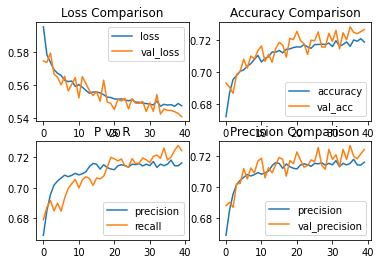

In [92]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(model.history.history['loss'], label='loss')
ax1.plot(model.history.history['val_loss'], label='val_loss')
ax1.title.set_text('Loss Comparison')
ax1.legend()
ax2.plot(model.history.history['accuracy'], label='accuracy')
ax2.plot(model.history.history['val_accuracy'], label='val_acc')
ax2.title.set_text('Accuracy Comparison')
ax2.legend()
ax3.plot(model.history.history['precision'], label='precision')
ax3.plot(model.history.history['recall'], label='recall')
ax3.title.set_text('P vs R')
ax3.legend()
ax4.plot(model.history.history['precision'], label='precision')
ax4.plot(model.history.history['val_precision'], label='val_precision')
ax4.title.set_text('Precision Comparison')
ax4.legend()

In [93]:
ann_acc = model.history.history['val_accuracy'][-1]
ann_prec = model.history.history['val_precision'][-1]
ann_rec = model.history.history['val_recall'][-1]
ann_f1 = 2 * ((ann_prec * ann_rec)/(ann_prec + ann_rec))
# ann_auc = model.history.history['val_auc'][-1]
metrics_dict[model_names[7]] =[ann_acc, ann_prec, ann_rec, ann_f1]

### Support Vector Machines

In [31]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

sclf = svm.SVC(decision_function_shape='ovo')
metrics_dict[model_names[8]] = cross_val_report(sclf, [x_train, x_test], [y_train, y_test])

# sclf.fit(x_train, y_train)
# y_pred_svm = sclf.predict(x_test)
# print(classification_report(y_test, y_pred_svm))

Accuracy: 0.709 (0.008)
                  precision    recall  f1-score   support

    sky is clear       0.71      0.68      0.70      6535
sky is not clear       0.71      0.73      0.72      6799

        accuracy                           0.71     13334
       macro avg       0.71      0.71      0.71     13334
    weighted avg       0.71      0.71      0.71     13334



In [42]:
#Creating a dictionary consisting of all the metrics of the models we observed
metrics_dict1 = {'Model': list(metrics_dict.keys()),
                 'Accuracy': [i[0] for i in list(metrics_dict.values())],
                 'Precision': [i[1] for i in list(metrics_dict.values())],
                 'Recall': [i[2] for i in list(metrics_dict.values())],
                 'F1-Score': [i[3] for i in list(metrics_dict.values())]}
metrics_dict

{'ANN': [0.7282034158706665,
  0.7282034158706665,
  0.7282034158706665,
  0.7282034158706665],
 'CatBoost': [0.7518374081295935,
  0.7519579874231992,
  0.751450430455084,
  0.7515429959899457],
 'Decision Tree': [0.704064796760162,
  0.7040196178284279,
  0.7040943169440845,
  0.7040189235407948],
 'Gradient Boosting Classifier': [0.7263386830658467,
  0.726369475332074,
  0.7259654728917897,
  0.7260362845897815],
 'Histogram Based GBM': [0.7411879406029699,
  0.7410900196117627,
  0.7410403978351827,
  0.7410611986883173],
 'LightGBM': [0.7449377531123443,
  0.7449283817022729,
  0.7446431374702589,
  0.7447137259104788],
 'Random Forest': [0.7615119244037798,
  0.7614365079606307,
  0.7613441285359372,
  0.7613795981653259],
 'SVM': [0.7081895905204739,
  0.7083343718753432,
  0.7076844866582724,
  0.7077330492559488],
 'XGBoost': [0.7123893805309734,
  0.7123927530702858,
  0.7120077292072183,
  0.7120686886125686]}

In [102]:
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient="index")
metrics_df

,0,1,2,3
Decision Tree,0.704065,0.704020,0.704094,0.704019
Random Forest,0.761512,0.761437,0.761344,0.761380
Gradient Boosting Classifier,0.726339,0.726369,0.725965,0.726036
Histogram Based GBM,0.741188,0.741090,0.741040,0.741061
XGBoost,0.712389,0.712393,0.712008,0.712069
LightGBM,0.744938,0.744928,0.744643,0.744714
CatBoost,0.751837,0.751958,0.751450,0.751543
ANN,0.726403,0.724469,0.729441,0.726947
SVM,0.708190,0.708334,0.707684,0.707733


In [103]:
metrics_df.insert(loc=0, column = '4', value = metrics_df.index)
metrics_df.set_index([pd.Index(range(0,len(metrics_df)))], inplace=True)
metrics_df.columns = list(metrics_dict1.keys())
metrics_df.sort_values(by='Accuracy', inplace=True)
metrics_df.iloc[:,1:] = metrics_df.iloc[:,1:]*100
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,70.406480,70.401962,70.409432,70.401892
8,SVM,70.818959,70.833437,70.768449,70.773305
4,XGBoost,71.238938,71.239275,71.200773,71.206869
2,Gradient Boosting Classifier,72.633868,72.636948,72.596547,72.603628
7,ANN,72.640342,72.446924,72.944087,72.694656
3,Histogram Based GBM,74.118794,74.109002,74.104040,74.106120
5,LightGBM,74.493775,74.492838,74.464314,74.471373
6,CatBoost,75.183741,75.195799,75.145043,75.154300
1,Random Forest,76.151192,76.143651,76.134413,76.137960


In [104]:
fig = px.histogram(metrics_df, x='Model', y= ['Accuracy','Precision','Recall','F1-Score'], 
                   labels={'variable':'Scores', 'value':'value'}, color_discrete_sequence=px.colors.qualitative.Dark2[2:6],
                   height=400, barmode='group', title='Comparison Between Models')
fig.show()

From the figure, its clear that the <i>Decision Tree</i> has the lowest scores compared with other models and <i>Random Forest</i> has highest score compared to the rest. So for optimizing hyperparameters, we will go ahead with Random Forest Model

### Binning

In [58]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

Kbin_hum=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_pres=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_temp=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_winddir=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
Kbin_wind_spd=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

trf=ColumnTransformer([('first',Kbin_hum,[0]),('second',Kbin_pres,[1]), ('third',Kbin_temp,[2]), ('fourth',Kbin_winddir,[3]), ('fifth',Kbin_wind_spd,[4])])

x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



In [59]:
print(trf.named_transformers_['first'].n_bins_)
print(trf.named_transformers_['first'].bin_edges_)

[15]
[array([-3.76640353, -1.57573659, -1.08892172, -0.78466242, -0.54125498,
        -0.29784754, -0.11529197,  0.00641175,  0.12811547,  0.31067105,
         0.43237477,  0.61493035,  0.85833778,  0.9800415 ,  1.2843008 ,
         2.01452311])                                                   ]


In [60]:
clf = DecisionTreeClassifier(criterion='gini').fit(x_train_trf, y_train)
y_pred_trf = clf.predict(x_test_trf)
print(classification_report(y_test, y_pred_trf))

                  precision    recall  f1-score   support

    sky is clear       0.64      0.68      0.66      4320
sky is not clear       0.68      0.63      0.65      4569

        accuracy                           0.66      8889
       macro avg       0.66      0.66      0.66      8889
    weighted avg       0.66      0.66      0.66      8889



In [61]:
clf = RandomForestClassifier(n_estimators=120, criterion='entropy').fit(x_train_trf, y_train)
y_pred_trf = clf.predict(x_test_trf)
print(classification_report(y_test, y_pred_trf))

                  precision    recall  f1-score   support

    sky is clear       0.69      0.71      0.70      4320
sky is not clear       0.72      0.70      0.71      4569

        accuracy                           0.70      8889
       macro avg       0.70      0.70      0.70      8889
    weighted avg       0.70      0.70      0.70      8889



### Hyperparameter Optimization with Optuna:
Since we have accuracy of RandomForest model as highest, we will try to optimize the hyperparameters

In [92]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 210 kB 43.6 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 149 kB 44.0 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 113 kB 42.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=6e958659453694fc66f003aa52fac11954224f29f723f53704d6fe8cc2af83df
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [95]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def get_params(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 500)
  max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
  min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
  max_features = 'log2'
  bootstrap = False
  clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features, bootstrap = bootstrap )
  return cross_val_score(clf, x_train, y_train, n_jobs=-1, cv=3).mean()

In [96]:
study = optuna.create_study(direction='maximize')
study.optimize(get_params, n_trials=100)

[I 2022-02-21 06:29:31,485] A new study created in memory with name: no-name-f366dcd7-d1bb-4b66-8d5f-08081d9e1d68
[I 2022-02-21 06:29:45,412] Trial 0 finished with value: 0.6722124477425736 and parameters: {'n_estimators': 448, 'max_depth': 3.5408496140364307, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6722124477425736.
[I 2022-02-21 06:29:50,113] Trial 1 finished with value: 0.6062950935967298 and parameters: {'n_estimators': 322, 'max_depth': 1.3309665886641042, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.6722124477425736.
[I 2022-02-21 06:29:56,444] Trial 2 finished with value: 0.6062950935967298 and parameters: {'n_estimators': 442, 'max_depth': 1.5212014180707747, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.6722124477425736.
[I 2022-02-21 06:30:02,936] Trial 3 finished with value: 0.6062950935967298 and parameters: {'n_estimators': 450, 'max_depth': 1.2295311341030146, 'min_sa

In [98]:
study.best_trial.params

{'max_depth': 18.517405419393747,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 102}

In [100]:
clf = RandomForestClassifier(n_estimators=102, max_depth=18.51740542, min_samples_leaf=1, min_samples_split=4).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    sky is clear       0.77      0.73      0.75      6504
sky is not clear       0.77      0.80      0.78      7072

        accuracy                           0.77     13576
       macro avg       0.77      0.77      0.77     13576
    weighted avg       0.77      0.77      0.77     13576



### Observations

1. Even after optimisation, the model score isn't getting much of an improvement.

2. From the correlation matrix (heatmap), we can see that the variables have very less correlation between them with the exclusion of wind_speed and wind_direction (correlation=0.56).

3. Introduction of Binning Technique further deteriorated the score.

4. Have to continue with another approach yielding with better results.